# Collective progress

**Example notebook for creating anonymised, collective information on progress**

* Before running this notebook, you need to prepare the data you want to assess. To do so, please use the notebook - ""
* For testing, some example data is available in the folder "proc_data"
* Enter the name of the file that you wish to use in the first cell, after that you can run the full notebook with minimal changes. 

In [1]:
# import modules

# system 
import re
import os

# calculation
import pandas as pd
import numpy as np

# plotting
%matplotlib inline
import seaborn
import matplotlib

# global stocktake tools
from gst_tools.make_plots import *
import gst_tools.gst_utils as utils


## LJ notes...

The code below has been tested with
* 'UN-population-data-2017.csv'
* 'PRIMAP-hist_v2.0_Energy-CO2.csv'

TODOs
* clearly define 'proc-data' file format
* decide on final plots
* automatically include the source in plots somehow
 

In [3]:
# USER INPUT

# First, choose which file you want to plot the data for
#data_file_name = 'UN-population-data-2017.csv'
#data_file_name = 'PRIMAP-hist_v2.0_Energy-CO2.csv'
data_file_name = 'PRIMAP-hist_UN-2017_calc__CO2-per-population.csv'

# Second, choose which years you are interested in analysing
years_of_interest = ['1990', '2000', '2014']


In [ ]:
# DATA READING AND PREP

# read the data from file 
fname_in = os.path.join('proc-data', data_file_name)
data = pd.read_csv(fname_in)

# Check the data format
if not utils.verify_data_format(data):
    print('WARNING: The data is not correctly formatted! Please check before continuing!')

# extract the key information
variable = data['variable'].unique()[0]
unit = data['unit'].unique()[0]

# tidy up for next stesps
data_years = utils.set_countries_as_index(data)
data_years = data_years.dropna(axis=1, how='any')

# remove comment below to display the data
#data_years

-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 1990, dtype: float64)
upper outliers are: 
country
BHR    25.003478
LUX    26.716188
Name: 1990, dtype: float64
---


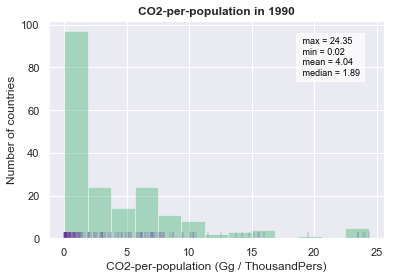

-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2000, dtype: float64)
upper outliers are: 
country
ARE    31.284420
BHR    27.986169
KWT    25.844317
QAT    57.575384
Name: 2000, dtype: float64
---


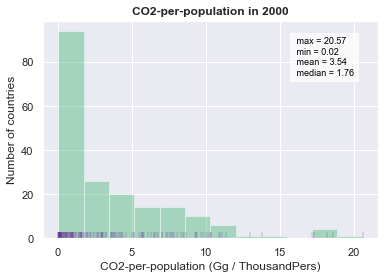

-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2014, dtype: float64)
upper outliers are: 
country
ARE    26.348088
BHR    22.897388
BRN    21.690341
KWT    22.842338
QAT    44.221344
TTO    33.887218
Name: 2014, dtype: float64
---


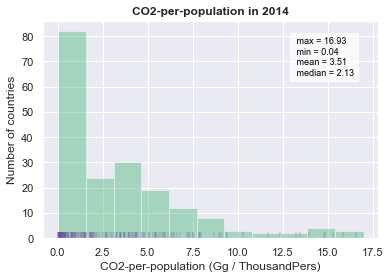

In [3]:
# Plot 1 - make a histogram of absolute data

for selected_year in years_of_interest:
    make_histogram(data_years[selected_year], variable, unit, remove_outliers=True)


Averaging trend over 5 years.
bins set to range(-34, 34, 2)


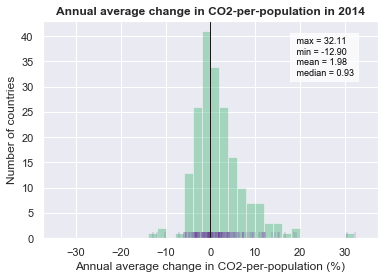

In [4]:
# Plot 2 - trends

# Calculate trends and define plotting params    
# TODO - improve description here. 
trends, rolling_trends, trends_unit = utils.calculate_trends(data_years, num_years_trend=5)
trends_variable = 'Annual average change in ' + variable

# plot the trend in the final year
make_histogram(rolling_trends.iloc[:,-1], trends_variable, trends_unit)


Calculating difference compared to 1990
Calculating difference compared to 2005
---------
All values in the series are the same! Exiting plotting routine for change since 1990
---------
-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2000, dtype: float64)
upper outliers are: 
country
GNQ    379.007046
LAO    230.355095
NPL    300.359835
SYC    231.866340
TGO    250.300459
TLS    292.135133
Name: 2000, dtype: float64
---
bins set to range(-160, 160, 16)


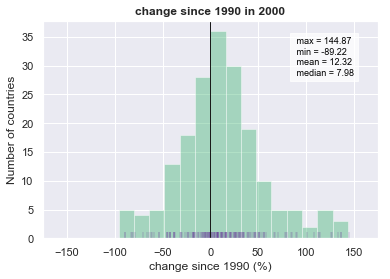

-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2014, dtype: float64)
upper outliers are: 
country
GNQ    2963.543492
NPL     644.726981
VNM     487.204788
Name: 2014, dtype: float64
---
bins set to range(-432, 432, 36)


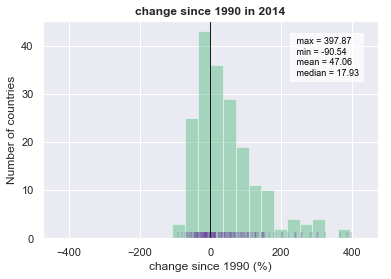

bins set to range(-570, 570, 15)


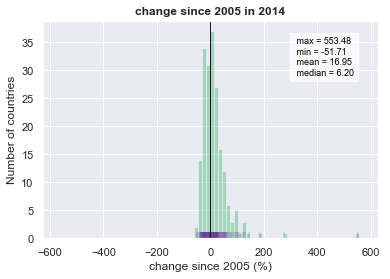

-----------
Identifying and removing outliers
lower outliers are:
Series([], Name: 2014, dtype: float64)
upper outliers are: 
country
AFG    553.476750
MOZ    273.734321
NIU    185.743647
Name: 2014, dtype: float64
---
bins set to range(-165, 165, 15)


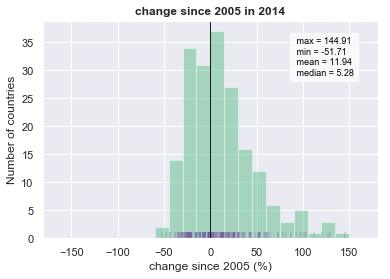

In [5]:
# Plot 3 - change since year X

# run calculations
df_abs_diff_1990, df_perc_diff_1990 = utils.calculate_diff_since_yearX(data_years, '1990')
df_abs_diff_2005, df_perc_diff_2005 = utils.calculate_diff_since_yearX(data_years, '2005')

# make plots
# TODO - titles currently missing necessary information here!
for selected_year in years_of_interest:
    make_histogram(df_perc_diff_1990[selected_year], "change since 1990", "%", remove_outliers=True, kTuk=3)

make_histogram(df_perc_diff_2005.iloc[:,-1], "change since 2005", '%', remove_outliers=False)
make_histogram(df_perc_diff_2005.iloc[:,-1], "change since 2005", '%', remove_outliers=True)
